<a href="https://colab.research.google.com/github/cfcastillo/DS-6-Notebooks/blob/main/Project_6_Notebook_cfc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition

The purpose of this project is to get familiar with Deep Learning by using pre-pickled data in conjunction with **blah blah blah** to analyze an animal image and classify the animal species.

Pickling is the process of constructing (serializing) or deconstructing (de-serializing) an object into a binary/byte form. A pickled object contains the information needed to reconstruct the object later. Pickling can be used when transporting large amounts of data.

This is a **binary classification** problem because our target will be a 1 or 0 to indicate if the image is a cat (1) or dog(0).



# Data Collection

## Imports

In [35]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
from PIL import Image, ImageOps #Python imaging library for importing an image
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [36]:
# Mount Drive
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [37]:
# Load Data
data_path = '/drive/My Drive/Cohort_6/Projects/Project 6/Data/'
X_data_file = 'X.pickle'
y_data_file = 'y.pickle'
image_name = 'dog.jpg'

# Read pickle data
df_X_read = pickle.load(open(data_path + X_data_file, 'rb'))
df_y_read = pickle.load(open(data_path + y_data_file, 'rb'))

In [38]:
# See what data types we have after reading the pickle files
# This was necessary after I failed to convert the data to a dataframe. I discovered
# that I could not convert an n-dimension array where n > 2 to a dataframe.
print(f'X type={type(df_X_read)}')
print(f'y type={type(df_y_read)}')

X type=<class 'numpy.ndarray'>
y type=<class 'list'>


In [39]:
# Check dimensions on X because failed to convert to dataframe and wanted to know why.
df_X_read.shape

(24946, 100, 100, 1)

# Data Cleaning

In [40]:
# Look at some values. Confirmed values fall between 0 and 255 
# because... a byte can contain decimal values from 0 to 255 = 2^8
print(f'max X = {df_X_read.min()}')
print(f'min X = {df_X_read.max()}')

max X = 0
min X = 255


In [41]:
# Scale the values to contain values from 0 to 1 by dividing by 255
df_X_scaled = df_X_read / 255

In [42]:
# Look at some values. Confirm values now fall between 0 and 1
print(f'scaled max X = {df_X_scaled.min()}')
print(f'scaled min X = {df_X_scaled.max()}')

scaled max X = 0.0
scaled min X = 1.0


In [43]:
# Convert y from list to numpy array so can be fit to model
df_y = np.array(df_y_read)
print(f'y type={type(df_y)}')

y type=<class 'numpy.ndarray'>


# Exploratory Data Analysis (EDA)

We have a 4 dimensional array. The dimensions are as follows#

- 2 dimensions give you black and white
- 3 dimensions give you color
- 4th dimension is over time - the volume.

Our data has one volume, so we need to slice out the 4th dimension to get the image data into a 3 dimensional format needed by imshow.

In [44]:
# Check dimensions on arrays. Confirm X has 4 dimensions.
# We have 24946 images that are 100x100 pixels.
df_X_scaled.shape

(24946, 100, 100, 1)

In [45]:
df_y.shape

(24946,)

[Link to using imshow plotting tool](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

[And another...](https://www.pythonpool.com/matplotlib-imshow/)

[Plotting 4 dimensional images](https://bic-berkeley.github.io/psych-214-fall-2016/intro_to_4d.html)

In [46]:
# Visualize one of the scaled images
# 2-dimensional arrays are black and white
# 3-dimensional arrays are color

# slice to get only the first 3 dimensions.
df_X_images = df_X_scaled[:,:,:,0]

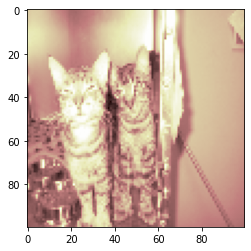

cat(1) or dog(0) = 1


In [47]:
# show the image and look at the response value
img_index = 24000
plt.imshow(df_X_images[img_index], cmap=plt.cm.pink)
# plt.imshow(cv2.cvtColor(img[img_index], cv2.COLOR_BGR2RGB))
plt.show()

# look at response value to see if it agrees with what we see
# 1 - cat
# 0 - dog
print(f'cat(1) or dog(0) = {df_y[img_index]}')


## Colors?

The natural colors from the image without any manipulation are turquoise/blue. I experimented with other color palettes. Anything in the monochrome range returned inverse colors. "pink" looked somewhat natural.

I would need to explore how to use color mapping to display the true image colors.

# Processing

## Create test and training sets

In [48]:
# Create training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, df_y, test_size=0.30, random_state=42)

In [49]:
X_train.shape

(17462, 100, 100, 1)

In [50]:
X_test.shape

(7484, 100, 100, 1)

In [51]:
y_train.shape

(17462,)

In [52]:
y_test.shape

(7484,)

In [53]:
X_train.shape[1:]

(100, 100, 1)

## Build neural network

Build a neural network with the following: 
1. Sequential layers
1. At least two 2D convolutional layers using the ‘relu’ activation function and a (3,3) kernel size. 
1. A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2). 
1. A dense output layer using the ‘sigmoid’ activation function. 


[Tensorflow documentation on how to do convolutional](https://www.tensorflow.org/tutorials/images/cnn)

[Another site describing how to add convolutional layers and how to choose parameters](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)


In [54]:
# Initialize model type
model = Sequential()

# first layer - 100,100 is shape size. 3 is for rgb color channel.
# input_shape(height, width, color channels) --> sliced X_train to get the last 3 dimensions for the input_shape.

# define layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
# define layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# define layer 3
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# flatten for output layer - this has something to do with labels.
model.add(Flatten())
# define output layer
# Dense first parameter is 1 neuron because it is a binary classification problem.
model.add(Dense(1, activation='sigmoid'))


## Compile model

Use the ‘adam’ optimizer. Determine which loss function and metric is most appropriate for this problem.

### Loss function selection

[How to choose a loss function](https://neptune.ai/blog/keras-loss-functions)

[Keras loss functions](https://keras.io/api/losses/)

### Metrics parameter selection

[How to choose a metrics function](https://neptune.ai/blog/keras-metrics)

[Keras metrics functions](https://keras.io/api/metrics/)


In [55]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fit Model

In [87]:
# Can add epochs if needed to improve model.
# Per Joe, batch_size should be evenly divisible by epochs. i.e. 32/8; 48/12, etc.
epochs = 12
model.fit(X_train, y_train, batch_size=48, epochs=epochs)

Epoch 1/12
364/364 [==============================] - 11s 30ms/step - loss: 0.0060 - accuracy: 0.9987
Epoch 2/12
364/364 [==============================] - 11s 30ms/step - loss: 0.0035 - accuracy: 0.9998
Epoch 3/12
364/364 [==============================] - 11s 29ms/step - loss: 0.0032 - accuracy: 0.9998
Epoch 4/12
364/364 [==============================] - 11s 30ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 5/12
364/364 [==============================] - 11s 29ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 6/12
364/364 [==============================] - 11s 30ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 7/12
364/364 [==============================] - 11s 29ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 8/12
364/364 [==============================] - 11s 30ms/step - loss: 0.0024 - accuracy: 0.9999
Epoch 9/12
364/364 [==============================] - 11s 29ms/step - loss: 0.0783 - accuracy: 0.9730
Epoch 10/12
364/364 [==============================] - 11s 30ms/step - loss: 0.014

## Evaluate Model

In [88]:
val_loss, val_acc = model.evaluate(X_test, y_test)
val_acc

234/234 [==============================] - 2s 10ms/step - loss: 1.0301 - accuracy: 0.8454


0.8454035520553589

## Testing Model with Imported Image

1. Define a function that will read in a new image and convert it to a 4 dimensional array of pixels.
1. Use the function defined above to read in the dog.jpg image that is saved in the Project 6/Data folder.
1. Use the neural network you created to predict whether the image is a dog or a cat.

**BONUS** Repeat above steps using photo of family pet.

[How to work with images in Python](https://www.geeksforgeeks.org/working-images-python/)

[OpenCV is another option for image processing](https://docs.opencv.org/4.x/)

In [58]:
def get_image(file_name):
  # retrieve image file
  img = Image.open(file_name)
  
  # retrieve and print file details
  width, height = img.size
  mode = img.mode
  format = img.format
  # print(f'width={width}; height={height}; mode={mode}; format={format}')

  # model based on 100x100 size images so convert to this size.
  img = img.resize((100,100))

  # convert to grayscale
  img_gs = ImageOps.grayscale(img)

  return img_gs

def image_to_array(file_name):
  img = get_image(file_name)

  # convert image to numpy array
  data = np.asarray(img)

  # scale the image
  data_scaled = data/255

  # make 4 dimensional array
  data_4dim = data_scaled.reshape(-1, data_scaled.shape[0],data_scaled.shape[1], 1)

  return data_4dim

[[0.00023505]]
prediction is 0


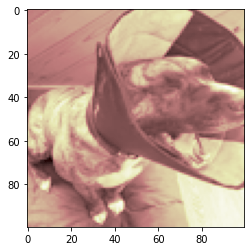

In [83]:
# dog image provided by instructor
# Run the image through the model and see the result. Should be 1 for cat or 0 for dog.
data = image_to_array(data_path + image_name)
prediction = model.predict(data)
print(prediction)
print(f'prediction is {np.argmax(prediction)}')

# view image
plt.imshow(get_image(data_path + image_name), cmap=plt.cm.pink)
plt.show()

[[1.]]
prediction is 0


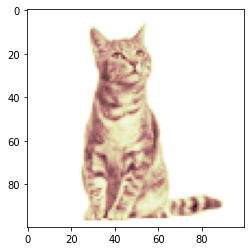

In [89]:
# cat image provided by me
# Run the image through the model and see the result. Should be 1 for cat or 0 for dog.
my_file = '/drive/MyDrive/Student Folder - Cecilia/Projects/Project 6 - Deep Learning/icat1.jpg'

prediction = model.predict(image_to_array(my_file))
print(prediction)
print(f'prediction is {np.argmax(prediction)}')

# view image
plt.imshow(get_image(my_file), cmap=plt.cm.pink)
plt.show()

# Communicate Results